In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import numpy as np
from statistics import mean 

In [2]:
movies_2015_2024 = pd.read_csv('../data/movies_2015_2024.csv')
movies_2015_2024.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,365000000,1405403694,99861
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,150000000,378858340,76341


In [3]:
# Converting financial data to 2024 dollars
# Store CPI values
cpi_data = pd.read_csv('../data/CPI_data.csv').set_index('Year')
budget_2024 = []
for year,budget in zip(movies_2015_2024['Year'], movies_2015_2024['Budget']):
    budget_adjusted = budget*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    budget_2024.append(budget_adjusted)
# Reassign adjusted budget numbers to the Budget column
movies_2015_2024['Budget'] = budget_2024
revenue_2024 = []
for year,revenue in zip(movies_2015_2024['Year'], movies_2015_2024['Revenue']):
    revenue_adjusted = revenue*(cpi_data.loc[2024,'CPI'] / cpi_data.loc[year,'CPI'])
    revenue_2024.append(revenue_adjusted)
# Reassign adjusted budget numbers to the Revenue column
movies_2015_2024['Revenue'] = revenue_2024
# Dropping zero values from budget and revenue
movies_2015_2024 = movies_2015_2024[~((movies_2015_2024['Revenue'].round() == 0.0) | (movies_2015_2024['Budget'].round() == 0.0))]
movies_2015_2024.head(2)

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,4.830729e+08,1.860034e+09,99861
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,1.985231e+08,5.014142e+08,76341


#### Exploratory Question: How do budget and revenue vary by year or by genre? #5

In [5]:
movies_2015_2024['budget_minus_rev'] = movies_2015_2024['Revenue'].sub(movies_2015_2024['Budget'], axis=0)
movies_2015_2024

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08
2,Inside Out,2015,"['Animation', 'Family', 'Adventure', 'Drama', ...",7.910,22924,2.316103e+08,1.135038e+09,150540,9.034273e+08
3,Jurassic World,2015,"['Action', 'Adventure', 'Science Fiction', 'Th...",6.699,21102,1.985231e+08,2.212259e+09,135397,2.013736e+09
4,The Martian,2015,"['Drama', 'Adventure', 'Science Fiction']",7.691,20590,1.429366e+08,8.351985e+08,286217,6.922619e+08
...,...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,['Drama'],7.400,1407,1.504948e+06,1.777696e+07,758866,1.627201e+07
1003,TÁR,2022,"['Music', 'Drama']",7.090,1426,3.751556e+07,3.113638e+07,817758,-6.379176e+06
1004,Women Talking,2022,['Drama'],6.861,661,2.143746e+07,8.134893e+06,777245,-1.330257e+07
1005,Maestro,2023,"['Drama', 'Romance', 'Music']",6.292,791,8.235955e+07,3.088483e+05,523607,-8.205070e+07


In [6]:
movies_2015_2024['profitable'] = movies_2015_2024['budget_minus_rev'] > 0
movies_2015_2024

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"['Action', 'Adventure', 'Science Fiction']",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
1,Mad Max: Fury Road,2015,"['Action', 'Adventure', 'Science Fiction']",7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08,True
2,Inside Out,2015,"['Animation', 'Family', 'Adventure', 'Drama', ...",7.910,22924,2.316103e+08,1.135038e+09,150540,9.034273e+08,True
3,Jurassic World,2015,"['Action', 'Adventure', 'Science Fiction', 'Th...",6.699,21102,1.985231e+08,2.212259e+09,135397,2.013736e+09,True
4,The Martian,2015,"['Drama', 'Adventure', 'Science Fiction']",7.691,20590,1.429366e+08,8.351985e+08,286217,6.922619e+08,True
...,...,...,...,...,...,...,...,...,...,...
1002,Drive My Car,2021,['Drama'],7.400,1407,1.504948e+06,1.777696e+07,758866,1.627201e+07,True
1003,TÁR,2022,"['Music', 'Drama']",7.090,1426,3.751556e+07,3.113638e+07,817758,-6.379176e+06,False
1004,Women Talking,2022,['Drama'],6.861,661,2.143746e+07,8.134893e+06,777245,-1.330257e+07,False
1005,Maestro,2023,"['Drama', 'Romance', 'Music']",6.292,791,8.235955e+07,3.088483e+05,523607,-8.205070e+07,False


In [7]:
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)
movies_exploded = movies_2015_2024.explode('Genre', ignore_index = False)

In [8]:
movies_exploded

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,Action,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
0,Avengers: Age of Ultron,2015,Adventure,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
0,Avengers: Age of Ultron,2015,Science Fiction,7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
1,Mad Max: Fury Road,2015,Action,7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08,True
1,Mad Max: Fury Road,2015,Adventure,7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08,True
...,...,...,...,...,...,...,...,...,...,...
1005,Maestro,2023,Drama,6.292,791,8.235955e+07,3.088483e+05,523607,-8.205070e+07,False
1005,Maestro,2023,Romance,6.292,791,8.235955e+07,3.088483e+05,523607,-8.205070e+07,False
1005,Maestro,2023,Music,6.292,791,8.235955e+07,3.088483e+05,523607,-8.205070e+07,False
1006,Nickel Boys,2024,Drama,6.615,293,2.320000e+07,3.016380e+06,1028196,-2.018362e+07,False


In [9]:
movies_2015 = movies_2015_2024[movies_2015_2024['Year'] == 2015]
movies_2015

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
1,Mad Max: Fury Road,2015,"[Action, Adventure, Science Fiction]",7.627,23511,1.985231e+08,5.014142e+08,76341,3.028911e+08,True
2,Inside Out,2015,"[Animation, Family, Adventure, Drama, Comedy]",7.910,22924,2.316103e+08,1.135038e+09,150540,9.034273e+08,True
3,Jurassic World,2015,"[Action, Adventure, Science Fiction, Thriller]",6.699,21102,1.985231e+08,2.212259e+09,135397,2.013736e+09,True
4,The Martian,2015,"[Drama, Adventure, Science Fiction]",7.691,20590,1.429366e+08,8.351985e+08,286217,6.922619e+08,True
...,...,...,...,...,...,...,...,...,...,...
94,Victor Frankenstein,2015,"[Drama, Science Fiction, Thriller]",5.948,2202,5.293949e+07,4.526327e+07,228066,-7.676227e+06,False
95,Youth,2015,"[Comedy, Drama, Romance]",6.900,2144,1.768179e+07,2.646975e+06,310593,-1.503482e+07,False
96,Blackhat,2015,"[Crime, Thriller, Action]",5.514,2118,9.264411e+07,2.349579e+07,201088,-6.914832e+07,False
97,Aloha,2015,"[Drama, Comedy, Romance]",5.514,2111,4.896903e+07,3.474157e+07,222936,-1.422746e+07,False


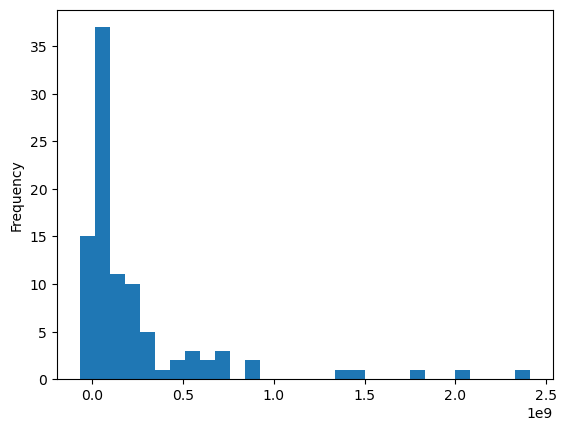

In [10]:
movies_2015['budget_minus_rev'].plot(kind='hist', bins = 30);

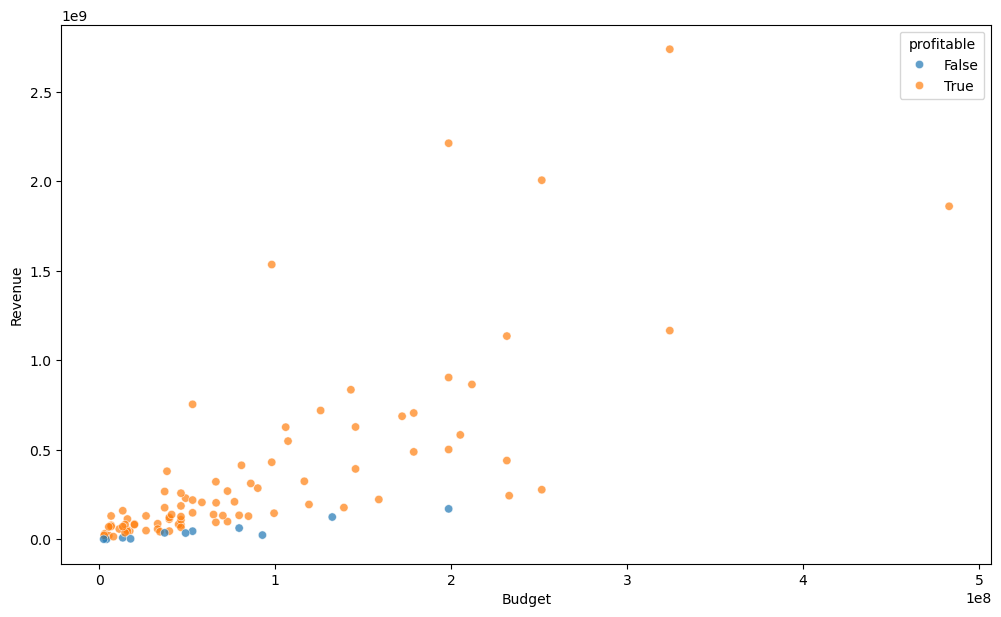

In [11]:
plt.figure(figsize = (12,7))
sns.scatterplot(
    data=movies_2015,
    x="Budget",
    y="Revenue",
    hue="profitable",
    alpha = 0.7
);

In [12]:
movies_2015[(movies_2015.Budget > 350000000) & (movies_2015.Revenue > 1000000)]

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True


In [13]:
movies_2015[(movies_2015.Budget > 200000000) & (movies_2015.Revenue > 15000000)]

,Title,Year,Genre,Vote_Average,Vote_Count,Budget,Revenue,TMDB_ID,budget_minus_rev,profitable
0,Avengers: Age of Ultron,2015,"[Action, Adventure, Science Fiction]",7.271,23855,4.830729e+08,1.860034e+09,99861,1.376961e+09,True
2,Inside Out,2015,"[Animation, Family, Adventure, Drama, Comedy]",7.910,22924,2.316103e+08,1.135038e+09,150540,9.034273e+08,True
6,Star Wars: The Force Awakens,2015,"[Adventure, Action, Science Fiction]",7.254,20076,3.242544e+08,2.737268e+09,140607,2.413013e+09,True
10,The Hunger Games: Mockingjay - Part 2,2015,"[Action, Adventure, Science Fiction]",6.899,13025,2.117580e+08,8.648040e+08,131634,6.530461e+08,True
12,Furious 7,2015,"[Action, Crime, Thriller]",7.223,11018,2.514626e+08,2.005613e+09,168259,1.754150e+09,True
13,Spectre,2015,"[Action, Adventure, Thriller]",6.600,10917,3.242544e+08,1.165605e+09,206647,8.413510e+08,True
22,Terminator Genisys,2015,"[Science Fiction, Action, Thriller, Adventure]",5.946,8730,2.051405e+08,5.831332e+08,87101,3.779927e+08,True
30,Tomorrowland,2015,"[Adventure, Family, Mystery, Science Fiction]",6.300,7196,2.514626e+08,2.768736e+08,158852,2.541096e+07,True
33,Jupiter Ascending,2015,"[Science Fiction, Fantasy, Action]",5.459,6930,2.329338e+08,2.435217e+08,76757,1.058790e+07,True
42,The Good Dinosaur,2015,"[Adventure, Animation, Family]",6.700,5834,2.316103e+08,4.396726e+08,105864,2.080624e+08,True


In [14]:
# Convert Genre column to list type so that it can be exploded
movies_2015_2024['Genre'] = movies_2015_2024['Genre'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) and x.startswith('[') else x)

<Figure size 1000x500 with 0 Axes>

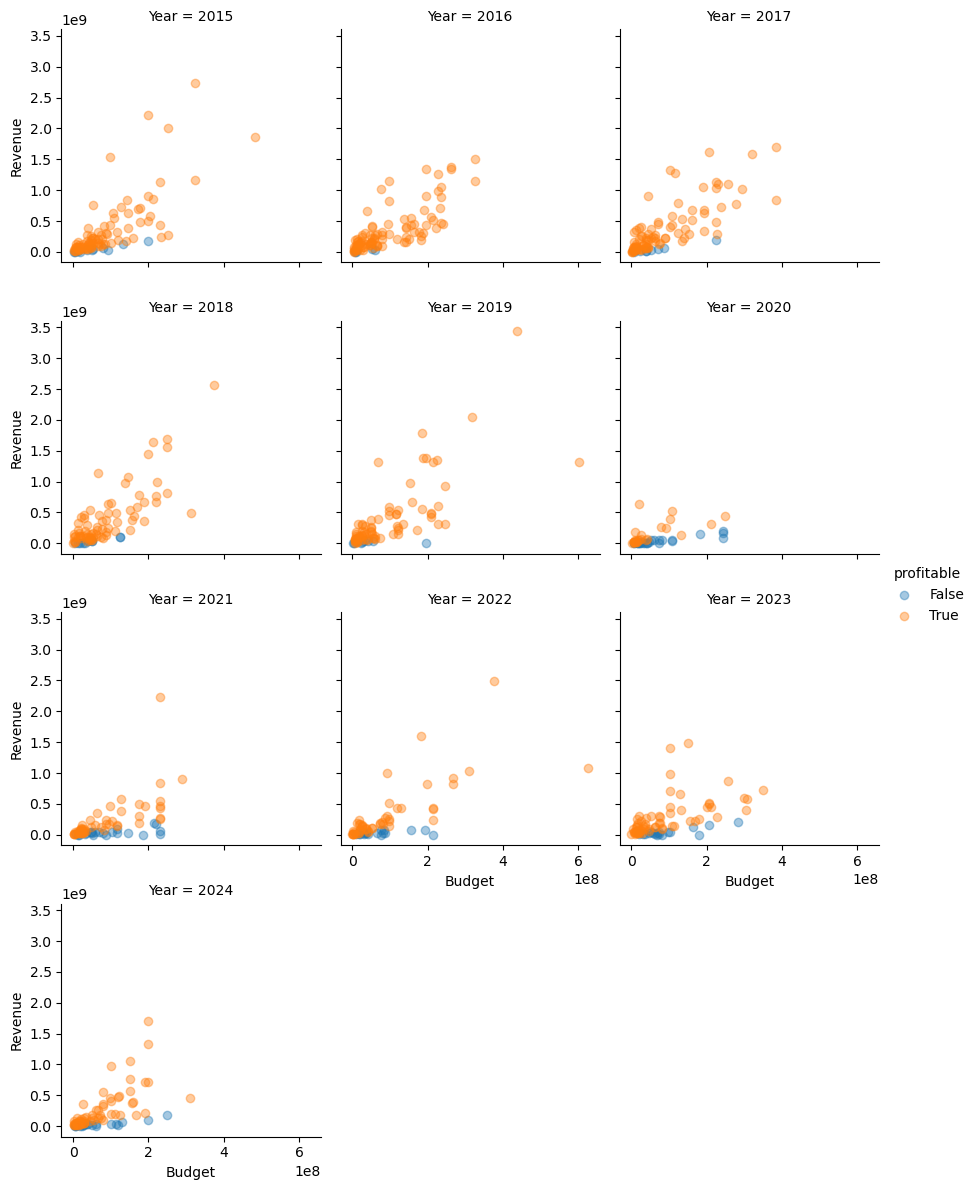

In [15]:
g = sns.FacetGrid(
    movies_2015_2024,
    col="Year",
    col_wrap=3,
    hue="profitable"#,
    #sharey=False
)

plt.figure(figsize=(10,5))
g.map(plt.scatter, 'Budget', 'Revenue', alpha=0.4).add_legend()
#plt.yticks(np.arange(0, 100000, step=5000))
plt.show()

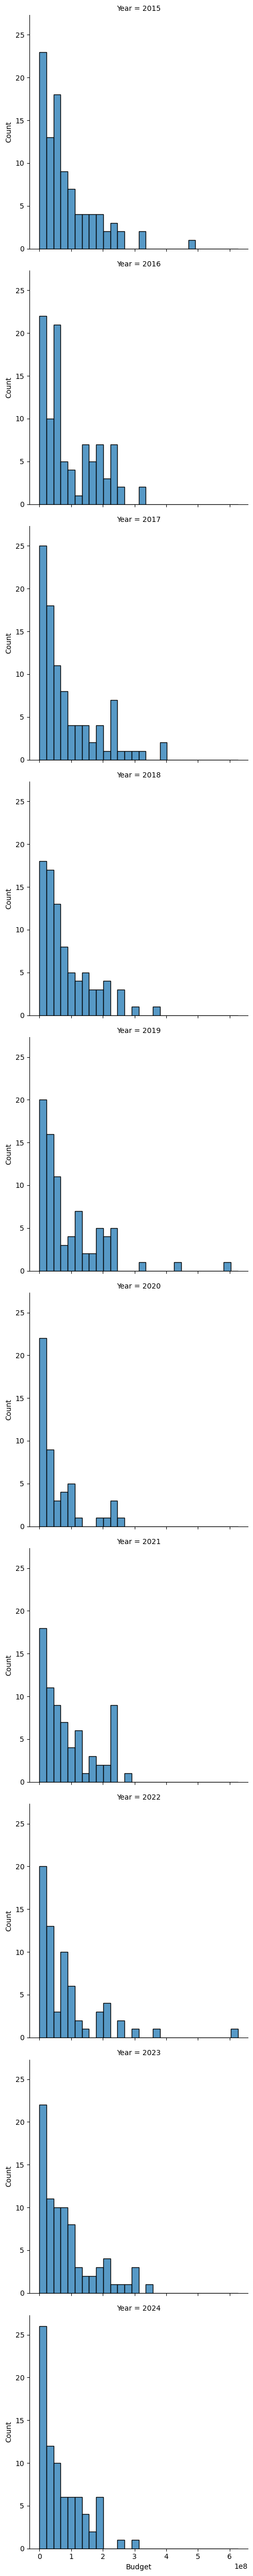

In [16]:
df = movies_2015_2024
sns.displot(
    df,
    x="Budget",
    col="Year",
    col_wrap=1#,
    #hue="profitable"#,
    #sharey=False
)

In [17]:
#g = sns.FacetGrid(movies_2015_2024, col="Revenue", row="Budget")#, margin_titles=True)
#g.map_dataframe(
#    sns.scatter, x="Budget", y="Revenue", color="orange", order=movies_2015_2024["Year"].unique()
#)
#g.set_axis_labels("Budget")
#g.set_xticklabels(rotation=90)

In [18]:
#g = sns.pairplot(movies_2015_2024, kind='scatter', plot_kws={'alpha': 0.1})

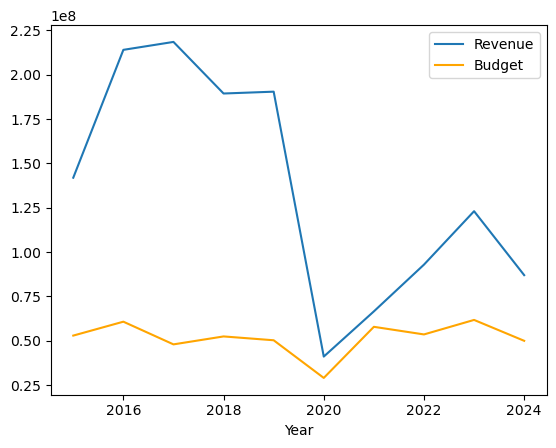

In [19]:
#plt.figure(figsize = (12,7))

median_rev_by_year = movies_2015_2024.groupby('Year')['Revenue'].median().reset_index()
median_budget_by_year = movies_2015_2024.groupby('Year')['Budget'].median().reset_index()
ax = median_rev_by_year.plot(x='Year', y='Revenue', kind='line')
median_budget_by_year.plot(ax=ax, x='Year', y='Budget', kind='line', color='orange')
plt.show();


In [20]:
df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df

,Genre,variable,value
0,Action,Revenue,1.860034e+09
1,Adventure,Revenue,1.860034e+09
2,Science Fiction,Revenue,1.860034e+09
3,Action,Revenue,5.014142e+08
4,Adventure,Revenue,5.014142e+08
...,...,...,...
4571,Drama,Budget,8.235955e+07
4572,Romance,Budget,8.235955e+07
4573,Music,Budget,8.235955e+07
4574,Drama,Budget,2.320000e+07


In [21]:
median_rev_by_year

,Year,Revenue
0,2015,1.419077e+08
1,2016,2.139488e+08
2,2017,2.184138e+08
3,2018,1.893482e+08
4,2019,1.903806e+08
5,2020,4.111133e+07
6,2021,6.657943e+07
7,2022,9.293139e+07
8,2023,1.230282e+08
9,2024,8.699969e+07


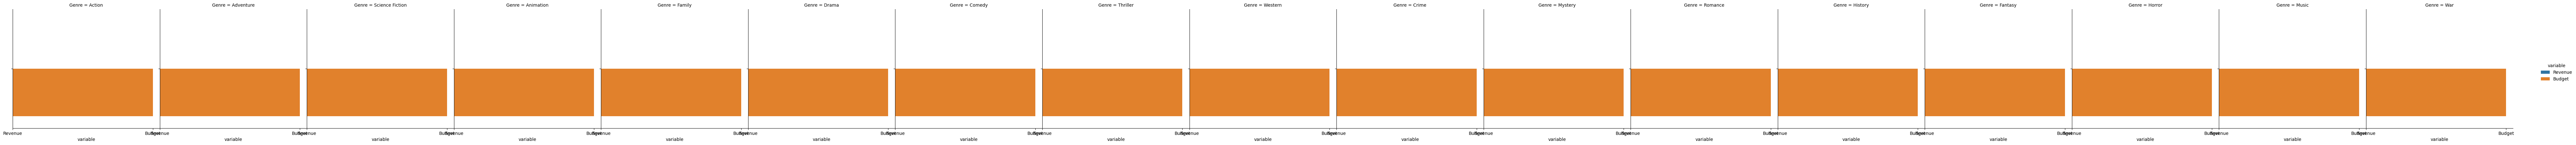

In [37]:
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median().reset_index()
median_budget_by_year = movies_exploded.groupby('Genre')['Budget'].median().reset_index()

sns.catplot(x="variable", col="Genre", hue="variable",
                data=df,
                kind="bar")
for ax in g.axes.flat[1:]:
    sns.despine(ax=ax, left=True)
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_title())
    ax.set_title('')
    ax.margins(x=0.1) # slightly more margin as a separation
plt.subplots_adjust(wspace=0, bottom=0.18, left=0.06)
plt.show()

#plt.xticks(rotation = 75);

In [38]:
median_rev_by_year

,Genre,Revenue
0,Action,2.276651e+08
1,Adventure,3.611737e+08
2,Animation,4.350261e+08
3,Comedy,1.708600e+08
4,Crime,1.199330e+08
5,Drama,6.995841e+07
6,Family,3.913901e+08
7,Fantasy,2.484798e+08
8,History,8.215699e+07
9,Horror,8.367728e+07


<Figure size 800x500 with 0 Axes>

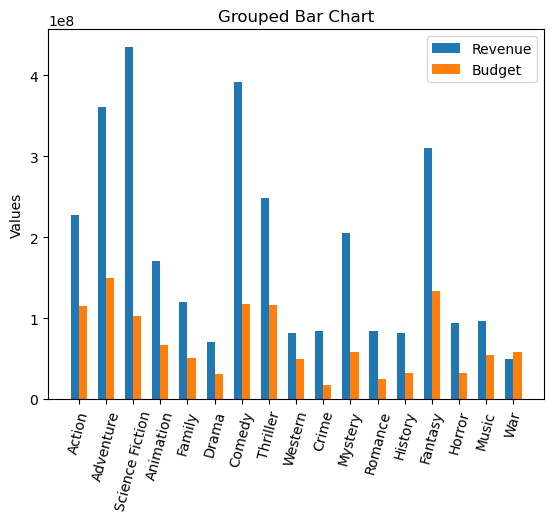

In [77]:
median_budget_by_year = movies_exploded.groupby('Genre')['Budget'].median()#.reset_index()
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median()#.reset_index()

plt.figure(figsize = (8,5))

#x = 
#y = movies_exploded["Revenue"]
#z = movies_exploded["Budget"]

w, x = 0.3, np.arange(len(movies_exploded["Genre"].unique()))

fig, ax = plt.subplots()
ax.bar(x - w/2, median_rev_by_year, width=w, label="Revenue")
ax.bar(x + w/2, median_budget_by_year, width=w, label='Budget')

ax.set_xticks(x)
ax.set_xticklabels(movies_exploded["Genre"].unique(), rotation=75)
ax.set_ylabel('Values')
ax.set_title('Grouped Bar Chart')
ax.legend()

plt.show();
#ax.set_xticklabels(rotation=90)

In [ ]:
median_rev_by_year = movies_exploded.groupby('Genre')['Revenue'].median().reset_index()
median_rev_by_year.plot(x='Genre', y='Revenue', kind='bar')
plt.xticks(rotation = 75);

In [ ]:
median_budget_by_year = movies_exploded.groupby('Genre')['Budget'].median().reset_index()
median_budget_by_year.plot(x='Genre', y='Budget', kind='bar')

In [ ]:
df

In [ ]:
df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Legend'})
#df['value'] = (df['value'] / 10000000)
df['value'] = np.log10(df['value']+1)
df

In [ ]:
df

In [ ]:
plt.figure(figsize = (12,7))

df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Legend'})
df['value'] = (df['value'] / 1000000)
ax = sns.boxplot(x = df['Genre'], y = df['value'], hue = df['Legend'])
#ax.set(ylim=(0, 300000000))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set(ylabel='USD (Millions)')
plt.xticks(rotation = 45);

In [ ]:
plt.figure(figsize = (12,7))

df = movies_exploded[['Genre', 'Revenue', 'Budget']]
df = df.melt(id_vars = 'Genre')
df = df.rename(columns = {'variable': 'Legend'})
df['value'] = (df['value'] / 10000000)
ax = sns.violinplot(x = df['Genre'], y = df['value'], hue = df['Legend'])
#ax.set(ylim=(0, 300000000))
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set(ylabel='USD (Millions)')
plt.xticks(rotation = 45);

In [ ]:

df

In [ ]:
df['value'] = (df['value'] / 1000000)
df